# 1. Import Libraries

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier

# 2. Load Data

In [63]:
# Set paths
path_climate = r'C:\Users\Jacques\OneDrive\Documents\Data Analytics course\Data Specialization\Part 1\Exercise 1.4'
climate = pd.read_csv(os.path.join(path_climate, 'DataSet_scaled.csv'))
pleasantweather = pd.read_csv(os.path.join(path_climate, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

# 3. Data Preperation

In [66]:
# Drop stations with insufficient data
activedf = climate.drop(columns=[
    'GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation',
    'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max',
    'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure',
    'ROMA_sunshine', 'ROMA_temp_mean',
    'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
    'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max'
])

In [68]:
# Define features and target
X = activedf.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [70]:
# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 4. Scale Features

In [73]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# 5. Train ANN using MultiOutputClassifier

In [76]:
# Wrap the ANN in MultiOutputClassifier for multi-output predictions
ann_model = MultiOutputClassifier(
    MLPClassifier(hidden_layer_sizes=(38,18,28), max_iter=2800, tol=1e-11)
)
ann_model.fit(X_train_sc, y_train)

MultiOutputClassifier(estimator=MLPClassifier(hidden_layer_sizes=(38, 18, 28),
                                              max_iter=2800, tol=1e-11))

# 6. Make Predictions

In [81]:
# Use the trained ANN model to generate predictions for both the test and training datasets
y_pred_test = ann_model.predict(X_test_sc)
y_pred_train = ann_model.predict(X_train_sc)

# 7. Compute Accuracy per Station

In [84]:
# Extract the list of weather station names from the feature columns
locations = [col.split('_')[0] for col in X.columns if '_temp_mean' in col]
locations.sort()
key = "_pleasant_weather"

In [88]:
# Calculate the accuracy for each weather station individually:
accuracy_dict = {}
for idx, name in enumerate(locations):
    y_true = y_test[name + key]
    y_pred_station = y_pred_test[:, idx]
    accuracy_dict[name] = round(accuracy_score(y_true, y_pred_station) * 100)

In [90]:
# Print results
for station, acc in accuracy_dict.items():
    print(f"{station}: {acc}%")
print(f"\nAverage Accuracy Across All Stations: {round(np.mean(list(accuracy_dict.values())))}%")

BASEL: 95%
BELGRADE: 94%
BUDAPEST: 95%
DEBILT: 94%
DUSSELDORF: 95%
HEATHROW: 95%
KASSEL: 96%
LJUBLJANA: 94%
MAASTRICHT: 94%
MADRID: 96%
MUNCHENB: 95%
OSLO: 95%
SONNBLICK: 100%
STOCKHOLM: 95%
VALENTIA: 98%

Average Accuracy Across All Stations: 95%


# 8. Confusion Matrices

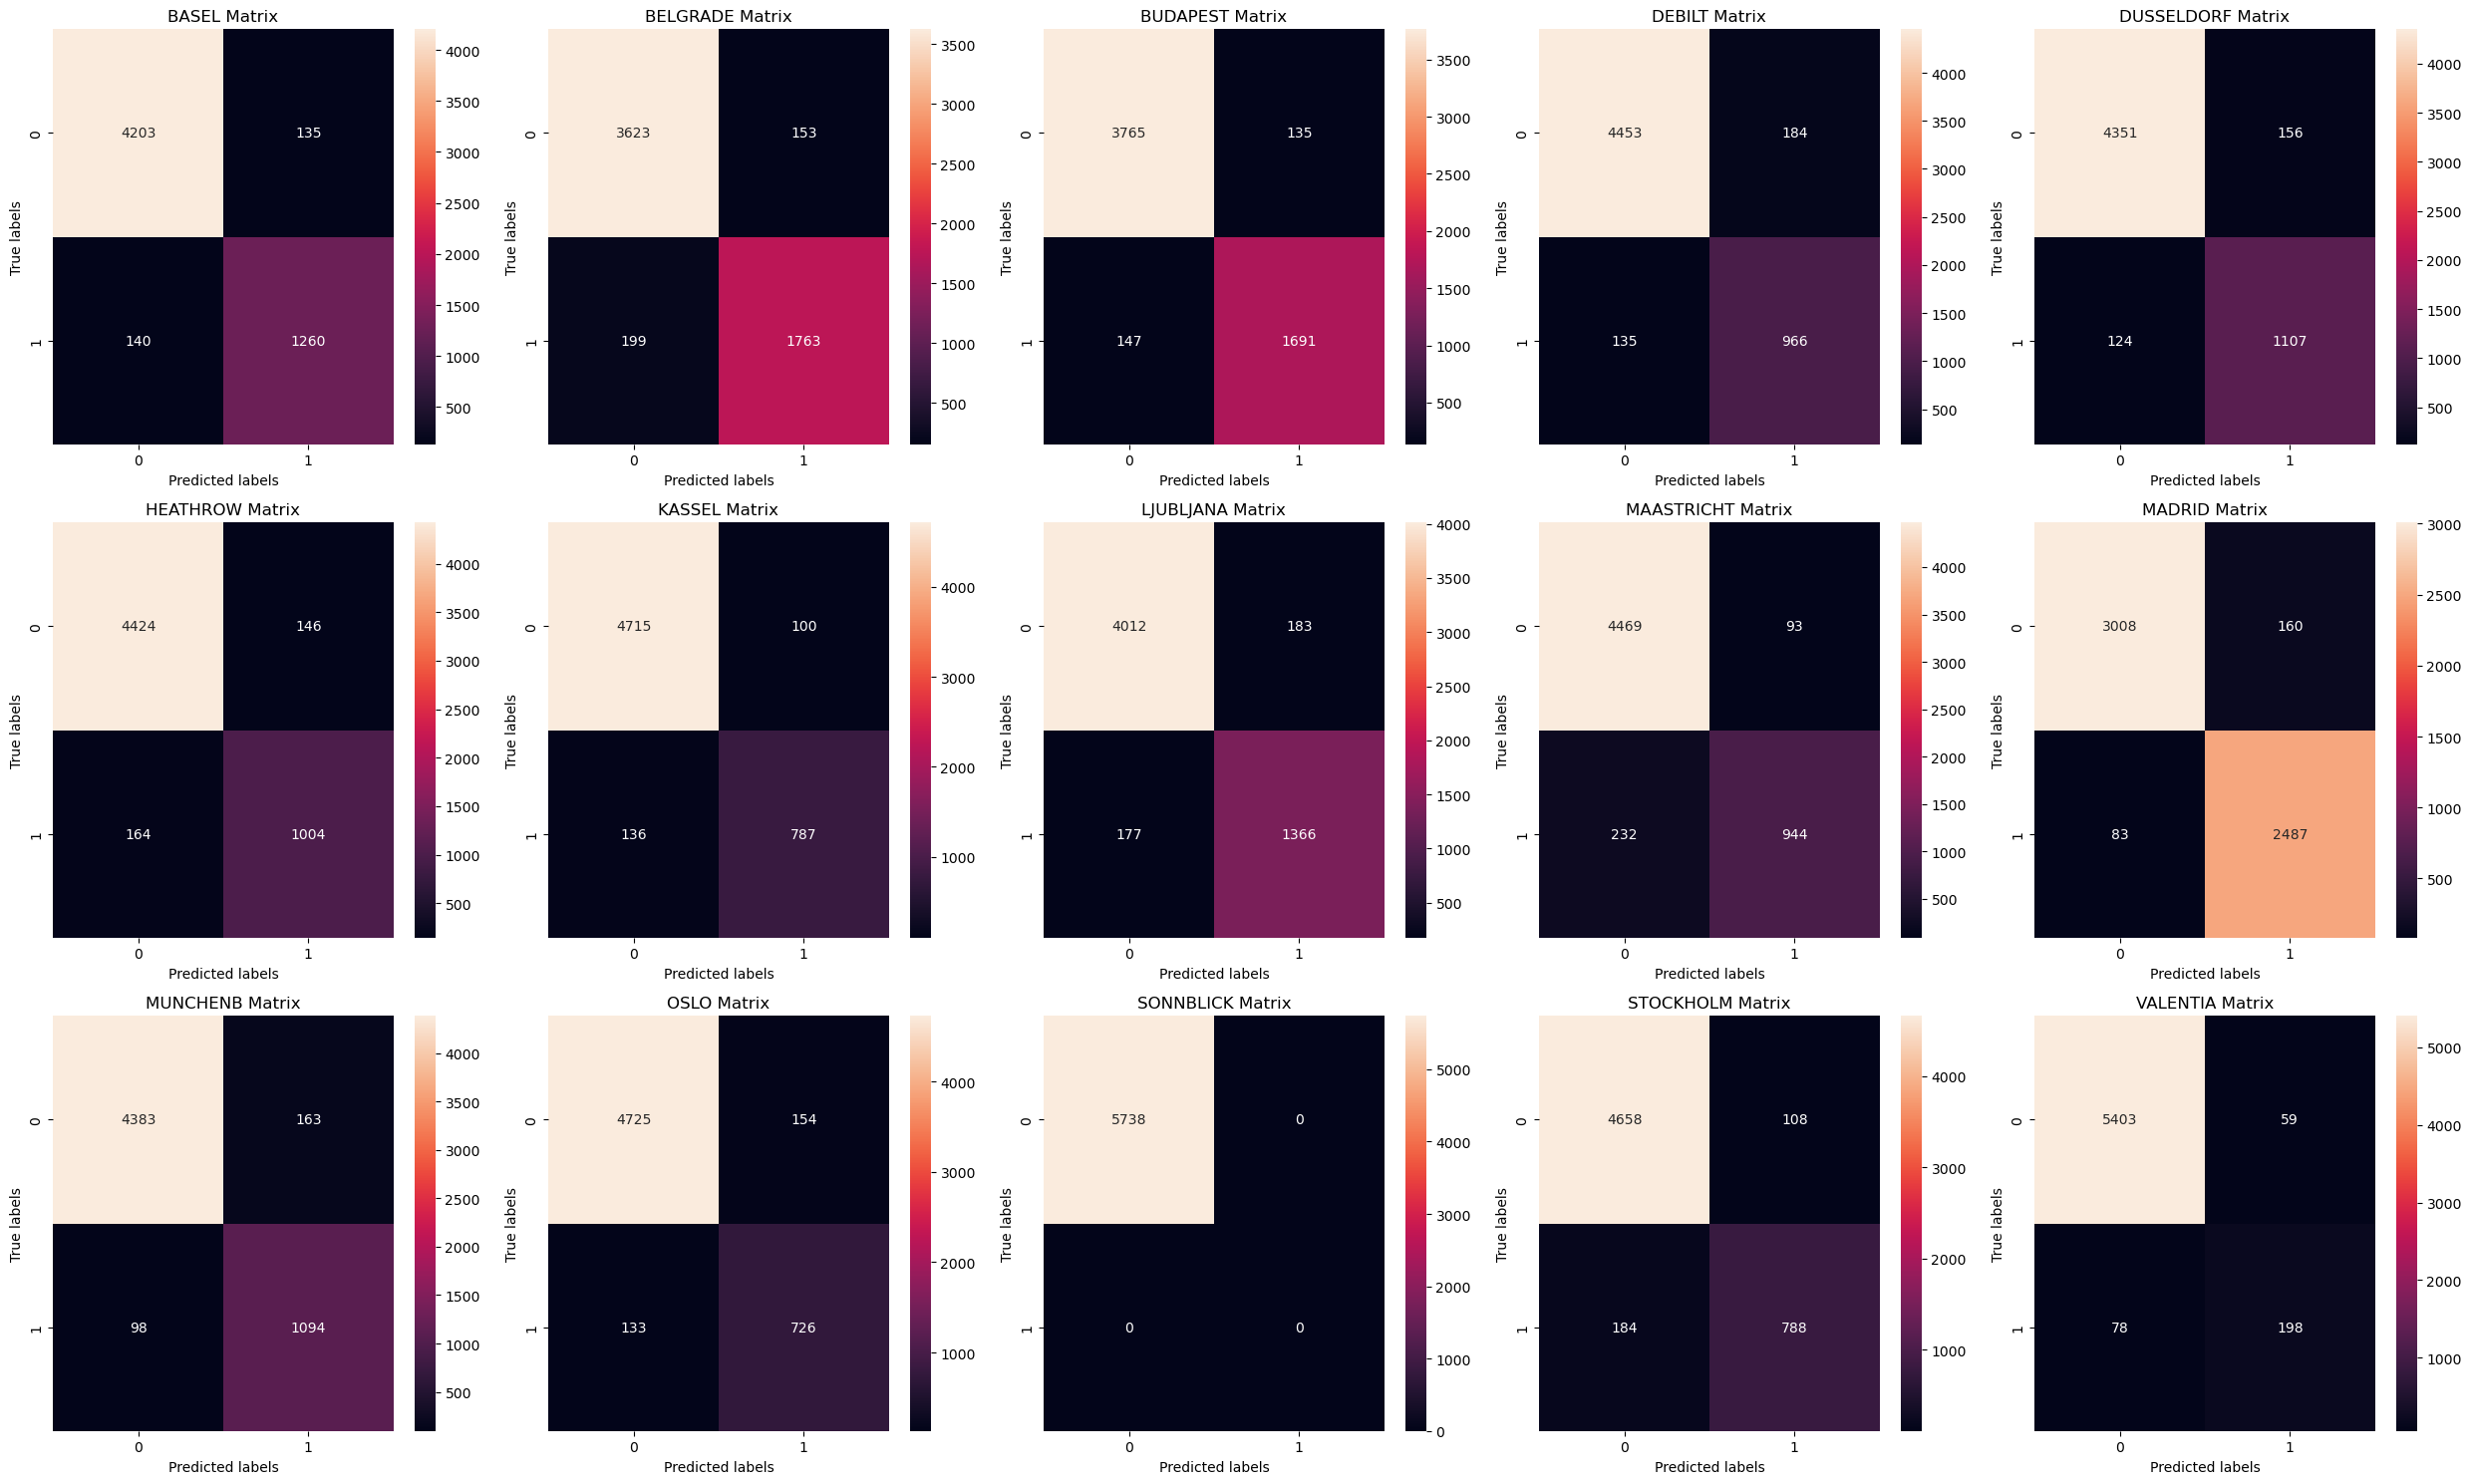

In [95]:
# Create a grid of confusion matrices for each weather station, ensuring all labels are included
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
count = 0
for i in range(3):
    for j in range(5):
        if count >= len(locations):
            break
        name = locations[count]
        cm = confusion_matrix(y_test[name + key], y_pred_test[:, count], labels=[0, 1])
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels')
        ax[i,j].set_title(name + ' Matrix')
        count += 1
plt.tight_layout()
plt.show()